# Comparação de Performance: Bellman-Ford x Dijkstra

In [4]:
import grafos
import networkx as nx
import time

from matplotlib import pyplot as plt

### Implementação dos algortimos Bellman-Ford e Dijkstra

In [5]:
def bellman_ford(grafo: nx.Graph, source: str):
    """Algoritmo de Bellman-Ford para grafos não
    direcionados. Source é o vértice inicial.
    """
    order = grafo.order()
    distance = {}
    
    for i in grafo.nodes():
        distance[i] = float("Inf")
    distance[source] = 0
    
    for _ in range(order-1):
        for u, v, d in grafo.edges(data=True):
            w = d["weight"]
            
            if distance[u]+w < distance[v]:
                distance[v] = distance[u]+w
                
            if distance[v]+w < distance[u]:
                distance[u] = distance[v]+w
                
    return distance

In [6]:
def dijkstra(grafo: nx.Graph, source: str):
    """Algoritmo de Dijkstra para grafos não
    direcionados. Source é o vértice inicial.
    """
    distance = {}
    not_visited = []
    
    for i in grafo.nodes():
        distance[i] = float("Inf")
        not_visited.append(i)
    distance[source] = 0
    
    while len(not_visited) > 0:
        current_node = get_min_key(distance, not_visited)
        not_visited.remove(current_node)
        
        for u, v, d in grafo.edges(current_node, data=True):
            w = d["weight"]
            
            if distance[u]+w < distance[v]:
                distance[v] = distance[u]+w
                
            if distance[v]+w < distance[u]:
                distance[u] = distance[v]+w
                
    return distance
        
        
def get_min_key(distances: dict, not_visited: list):
    return min(not_visited, key=lambda x: distances[x])

### Testando os algoritmos

A implementação do algoritmo de criação do grafo pode ser verificada em grafos.py

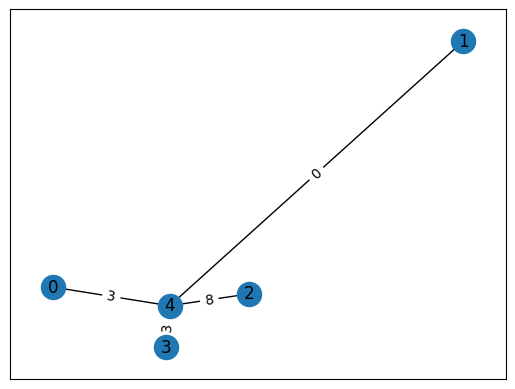

In [7]:
grafo = grafos.generate_random_connected_graph(5, 0.5)
grafos.draw_graph(grafo) # usar apenas para pequenas quantidades de vértices (<100)

In [8]:
bellman_ford(grafo, 1)

{0: 3, 1: 0, 2: 8, 3: 3, 4: 0}

In [9]:
dijkstra(grafo, 1)

{0: 3, 1: 0, 2: 8, 3: 3, 4: 0}

### Comparando o tempo do Bellman-Ford e do Dijkstra
Geramos grafos com diferentes tamanho, e comparamos o tempo de execução dos dois algoritmos
para cada um desses grafos.

In [10]:
bellman_time = []
dijkstra_time = []

tamanhos = list(range(100, 501, 50))

for size in tamanhos:
    grafo = grafos.generate_random_connected_graph(size, 0.5)
    
    # Measuring Bellman-Ford
    tic = time.perf_counter()
    bellman_ford(grafo, 1)
    toc = time.perf_counter()
    bellman_time.append(toc - tic)
    
    # Measuring Dijkstra
    tic = time.perf_counter()
    dijkstra(grafo, 1)
    toc = time.perf_counter()
    dijkstra_time.append(toc - tic)

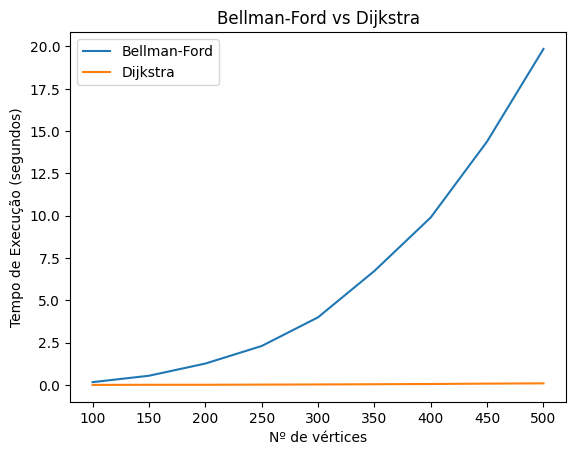

In [15]:
plt.title("Bellman-Ford vs Dijkstra")
plt.xticks(ticks=range(0, len(tamanhos)), labels=tamanhos)
plt.xlabel("Nº de vértices")
plt.ylabel("Tempo de Execução (segundos)")
plt.plot(bellman_time, label="Bellman-Ford")
plt.plot(dijkstra_time, label="Dijkstra")
plt.legend()

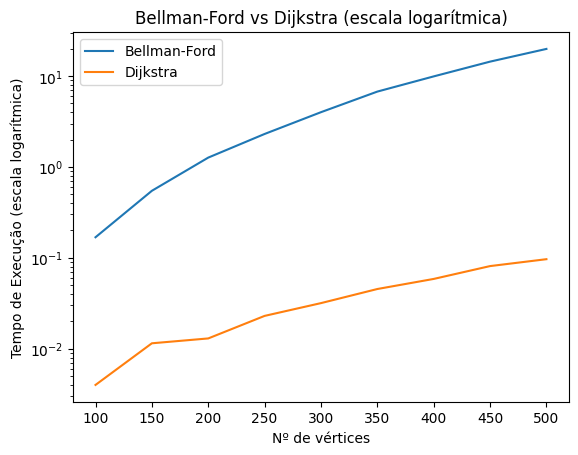

In [18]:
plt.title("Bellman-Ford vs Dijkstra (escala logarítmica)")
plt.xticks(ticks=range(0, len(tamanhos)), labels=tamanhos)
plt.xlabel("Nº de vértices")
plt.ylabel("Tempo de Execução (escala logarítmica)")
plt.yscale("log")
plt.plot(bellman_time, label="Bellman-Ford")
plt.plot(dijkstra_time, label="Dijkstra")
plt.legend()